# The Scikit Learn Python Library Overview

The scikit-learn (Sklearn) library contains simple and efficient tools for predictive data analysis.

It is the most useful and robust library for machine learning in Python. It provides a range of efficient tools for machine learning and statistical modeling [1]
It includes tools for:
- Classification: A process of categorizing a set of data into classes. Can be done on structured and unstructured data [2]
- Regression: Regression models are used to predict a continuous value.[3]
- Clustering : Clustering is grouping unlabeled examples to understand a data set. Common applications of clustering includes social network analysis, search result grouping, medical imaging[4]
- Dimensionality reduction: Techniques that reduce the number of input variable in training data. High demensional data might have hundres, thousands or even millions of input variables. Fewer inputs means fewer parameters or a simpler structure in the machine learning model. [5]

SKlearn is built upon NumPy, SciPy and Matplotlib




## Features
The Scikit-learn library is focused on modeling data. Some of the most popular models in the library include:
- Supervised learning algorithms : Almost all of the popular learning algorithms are part of scikit-learn. E.g. Linear Regression, Support Vector Machine, Decision Tree
- Unsupervised learning algorithms: Also has the popular unsupervised learning algorithms. E.g. clustering, factor analysis, PCA.
- Cross Validation : Used to check the accuracy of supervised models on unseen data.
- Ensemble Methods: Used to check the accuracy of supervised models on unseen data.

### Estimators - Learning and Predicting

Sklearn provides dozens of estimators which are built-in machine learning algorithms and models[6]. Each estimator can be fitted to some data using its fit method. This allows the estimator to learn from the model.

## Terminology


In [4]:
#example of fitting a RandomForestClassifier estimator to some basic data
from sklearn.ensemble import RandomForestClassifier as rfc
clf = rfc(random_state=0)

In [5]:
X = [[ 1,  2,  3],  # 2 samples, 3 features
    [11, 12, 13]]
y = [0, 1]  # classes of each sample
clf.fit(X, y)

RandomForestClassifier(random_state=0)

The fit method accepts 2 inputs:

1. The sample/design matrix, X. X represents data that is observed at training and prediction time. The size of X is typically (n_samples, n_features). This means that __samples are represented as rows__ and __features are represented as columns__.   
__Features are how samples are represented in a numeric or caterogical quantity.__[7]   

2. __The target values y__ which are real numbers for regression tasks, or integers for classification (or any other discrete set of values). For unsupervized learning tasks, y does not need to be specified. y is usually 1d array where the i th entry corresponds to the target of the i th sample (row) of X. 

Both X and y are usually expected to be numpy arrays.
Once the estimator is fitted, it can be used for predicting target values of new data. You don’t need to re-train the estimator:

# Support Vector Machines Algorithm(SVM)
SVM is a supervised machine learning algorithm that can be used for both classificaiton or regression challenges. Their most common use is classification however.  
Support Vector Machines are based on the idea of finding a hyperplane that best divides a dataset into classes.  
## Advantages
__High dimensional space input space:__ The algorithm allows the classification of data that has high dimensions. While other algorithms can also do this, a lot of problems can occur that must be adjusted for. The Support Vector Algorithm does this automatically.  
__Regularisation parameter(lambda)__: This parameter allows us to figure out if there is going to be a bias or overfitting. The SVM automatically avoids these problems.

### Uses  
This algorithm is used for predicting what class or group a data point falls into, based on an already existing data set. SVM is often used for text classification and for recognising images e.g. facial recognition.

#### Support Vectors   
Support Vectors are points on a graph that are closest to the hyperplane. If they are removed, it would affect the position of the hyperplane and as such they are considered the key elements of a dataset.

## Linear SVM
### Hyperplane
If a classification task only has two features(or two dimensions), then a hyperplane would be a simple regression line that linearly separates and classifies a set of data on a 2d graph. When this hyperplane is defined, we can now use it classify data points. Any point to one side of a line fis classified as group A, any point on the other side is classified as group B. The further a data point is from the hyperplane, the probabilty that it has been classified correctly increases. This means that when new testing data is added, the side of the hyperplane it lands on decides the class it is assigned to.[11]


### Example of using the Linear Support Vector Machine algorithm to classify data
Below, we will generate two random clusters, and attempt to classify them using the Linear Support Vector Machine algorithm. 
This task only has two features, which is what makes it linear. #

### Imports

In [6]:
#allows data generation
import sklearn.datasets as data

#allows plotting
import matplotlib.pyplot as plt

#allows use of numerical arrays
import numpy as np

#Data frames
import pandas as pd

#Helper Functions
import sklearn.model_selection as mod

#Algorithm/estimator
from sklearn.svm import SVC

#allows reading of each row in a file using comma dilemiter
import csv

#allows data generation
from sklearn.datasets import make_blobs

#allows plotting
import matplotlib.pyplot as plt

#allows use of numerical arrays
import numpy as np

#Data frames
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [7]:
#Generate data using make blobs method.[13]
#Pass it number of samples(datapoints) 
#Centers how many centers there will be for clusters
#make blobs returns numpy array
X,y= data.make_blobs(n_samples=125,centers=2,
                #select standard deviation, this is how spread out the values are
                cluster_std=0.7,random_state=0)

#Total number of samples, divided equally between features
print(X.size)
#Amount of samples in each cluster
print(y.size)

250
125


In [8]:
#Divide into training and test sets
train_X,test_X, train_y,test_y=mod.train_test_split(X,y,test_size=20, random_state=0)

#So what this does is takes the specified amount of samples from X and y values created
#by make_blobs and splits it into X and y test subsets called test_X and text_y
#The remainder of the samples is put into train_X and train_y[13]
print(train_X.size)
print(train_y.size)

print(test_X.size)
print(test_y.size)

210
105
40
20


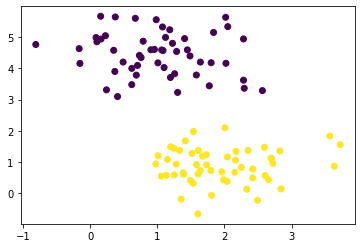

In [9]:
#create a scatter plot using the training data

#stores the first cluster in the first index position(purple)
#stores second cluster in the second index position(yellow)
#c allows the two clusters to be colour divied

#take all the first value of the rows from blob X, and then the second value of all the rows from blob X
plt.scatter(train_X[:,0], train_X[:,1],c=train_y)

We have divided the training set into two groups, purple and yellow, based on their x and y positions.  
This data can be easily separated by eyeballing a line without using any algorithm, however how do you know which line separates the data most accurately? The linear SVM algorithm finds the optimal line(hyperplane) using support vectors.  
The goal of the SVM is to find the biggest distance between the hyperplane and the support vectors. This is called a __margin__. A hyperplane is decided by finding the largest margins.

In [10]:
#linear kernel because data is linearly separable
svc = SVC(kernel='linear')
#train the support vector algorithm with training data
svc.fit(train_X,train_y)

SVC(kernel='linear')

Once the SVM is fitted with the training data, we are able categorize our data(classify) into classes/groups using the sklearn Support Vector Classification. In this case 0 and 1. By referring to the above graph we can see that the first 5 test samples are classified correctly.

In [11]:
print(test_X[:5])
print(svc.predict(test_X[:5]))

[[ 2.88688838  1.11952349]
 [ 0.50554777  4.05210011]
 [ 0.53224461  4.04986851]
 [ 1.48591254 -0.12883337]
 [ 3.1014067  -0.55132586]]
[1 0 0 1 1]


The next 5 samples are also classified correctly.

In [12]:
print(test_X[5:10])
print(svc.predict(test_X[5:10]))

[[1.70664481 2.2483361 ]
 [2.02776955 0.07999821]
 [1.50899649 4.38895984]
 [2.3223295  5.34014768]
 [0.69404622 5.15949888]]
[1 1 0 0 0]


This can be shown clearly if we introduce a hyperplane to our plot. 

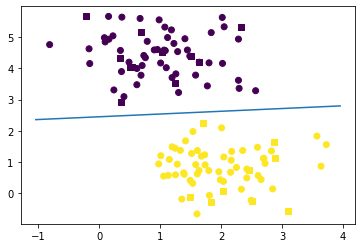

In [13]:
plt.scatter(train_X[:,0], train_X[:,1],c=train_y)

#get the axes
ax=plt.gca()
#range of x values
xlim= ax.get_xlim()
ylim= ax.get_ylim()

#add another scatter plot using the test set. Mark this plot using squares(marker='s')
ax.scatter(test_X[:,0], test_X[:,1],c=test_y, marker='s')

#Weights assigned to the features
w=svc.coef_[0]

#slope of line
a=-w[0]/w[1]

#range of x values for the hyperplane
xx=np.linspace(xlim[0],xlim[1])


#equation of the line
#slope * all the x values - the intercept
yy=a * xx-(svc.intercept_[0]/w[1])
plt.plot(xx,yy)
plt.show()

Thanks to the hyperplane, we can clearly see that all our test data, which is represented as squares, was classified correctly.

## Non linear SVM
### What happens if the data isn't this simple?
If your data has more than two features(dimensions). If this is the case, it is necessary to move to a higher dimensional viewpoint of the data. To do this we use a __kernel__ . 
### Kernel
The kernel allows for the transformation of the data into a higher or lower dimension, as necessary. The use of a kernel allows the SVM algorithm to view the data in a   
higher dimension, which in turn allows for the plotting of a hyperplane on more complex data.


# Classifying the Wine Quality Dataset

## Understanding the dataset

In [14]:
#Libraries we will use
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from math import sqrt
#from prettytable import PrettyTable

In [15]:
df=pd.read_csv("winequality-red.csv",sep=";")
df.head(10)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In order to get a better understanding of this data, I can use a __correlation matrix__.

<AxesSubplot:>

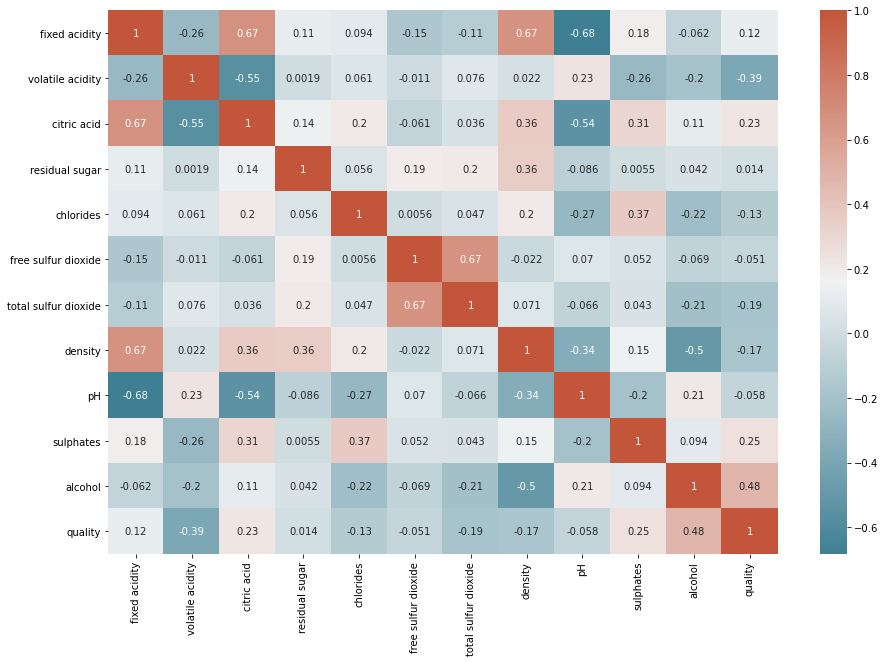

In [16]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

A correlation matrix gives us the correlation coefficient for every pair of features in the dataset.  
The formula returns a number between 1 and -1. What this means is:  
- A number close to 1 indicates a strong positive relationship between the two features.
- A number close to -1 indicates a strong negative relationship between the two features.
- 0 means there is no relationship. [14]

The matrix shows us that quality has the most correlations with other features. Its strongest correlation is alcohol content.  
Its second strongest correlation is volatile acidity, and its third strongest is sulphates.

In [17]:
x = df.groupby('quality')
x

In [18]:
x.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


## Quality vs alcohol
The two below graphs show me more details about the correlation between wine quallity and alcohol  
content. They show that generally, higher alcohol content is associated with higher quality wine.

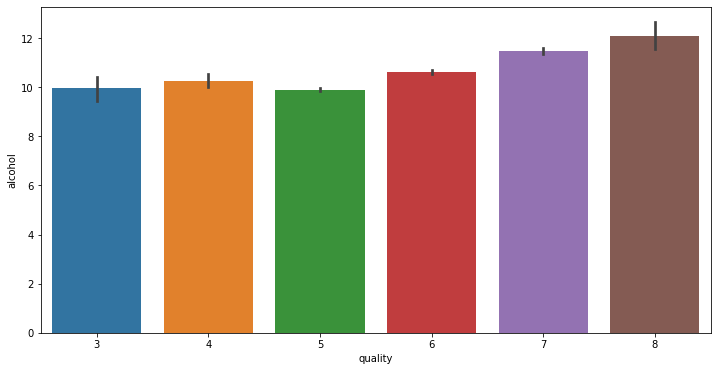

In [19]:
#plot alcohol vs quality, this shows us that as quality of wine increases
#so does the alcohol content
plt.figure(figsize=(12,6))
sns.barplot(x='quality', y='alcohol', data=df)
plt.show()

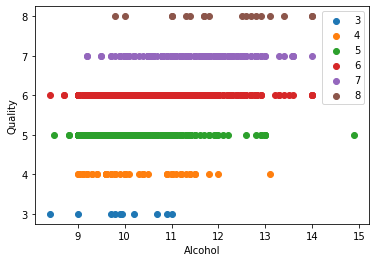

In [20]:
fig, ax = plt.subplots()

for quality, data in df.groupby('quality'):
    ax.scatter(data['alcohol'], data['quality'], label=quality)

#Label the axes.
ax.set_xlabel('Alcohol')
ax.set_ylabel('Quality')
ax.legend();

# Prepare data for classification

## Imbalanced dataset

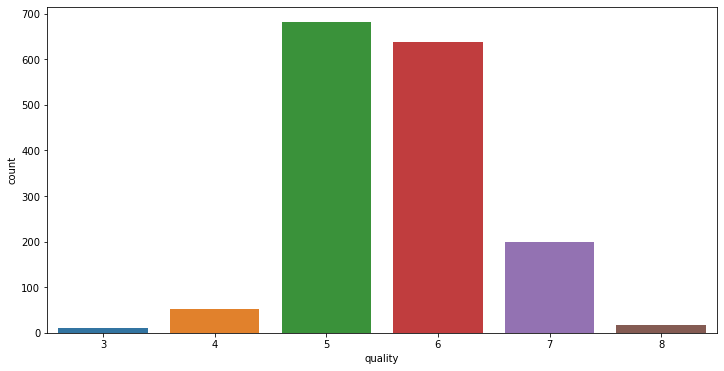

In [21]:
#Show distribution of qualities
plt.figure(figsize=(12,6))
x=df['quality']
sns.countplot(x=x)
plt.show()

The above plot shows us that there is an imbalance in this dataset. The amount of wine that has the qualities  
of 5 and 6 is very high in comparison to the others. The classes are not represented equally.

In [22]:
#count the exact amount of each quality
df.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


## Why does this matter?

If I train classification algorithms on this imbalanced dataset, I will get back a high classification accuracy.  
However, this accuracy will only apply to data that has the same imbalanced distribution.  
This means that I must fix this imbalance before I attempt to classify the data.[15]

In [23]:
#X has has the dependant variables
#drop all features except the quality 
x=df.drop(['quality'],axis=1)
y=df['quality']

### Over-sampling: SMOTE

The technique I will use to solve this issue is SMOTE(Synthetic Minority Oversampling Technique).

This strategy involves making additional samples for the elements that are in the minority.  In the case of this dataset,  
this technique will create additional datapoints or samples for the wine qualities other than 5,  
because quality 5 vastly outnumbers the rest. It will add enough to make the ratio of all qualities  
1:1. This fixes the imbalance of the dataset.

In [24]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x_res,y_res=oversample.fit_resample(x,y)

In [25]:
df['quality'].count()

1599

SMOTE increased the amount of qualities to achieve a 1:1 ratio.

In [26]:
y_res.count()

4086

In [37]:
#split the balanced dataset into a training set and into a test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2, random_state=0)

### Scale dataset

In [38]:
from sklearn.preprocessing import StandardScaler
stdscale = StandardScaler().fit(x_train)
x_train_std = stdscale.transform(x_train)
x_test_std = stdscale.transform(x_test)

In [39]:
x_test.count()

fixed acidity           818
volatile acidity        818
citric acid             818
residual sugar          818
chlorides               818
free sulfur dioxide     818
total sulfur dioxide    818
density                 818
pH                      818
sulphates               818
alcohol                 818
dtype: int64

In [40]:
x_train.count()

fixed acidity           3268
volatile acidity        3268
citric acid             3268
residual sugar          3268
chlorides               3268
free sulfur dioxide     3268
total sulfur dioxide    3268
density                 3268
pH                      3268
sulphates               3268
alcohol                 3268
dtype: int64

# Classification using the Decision Tree Algorithm

A decision tree asks a question and classifies data based on the answer. The classification can be categorical, or numeric. Decision trees can combine these  
classification types in the same tree. Decision trees start at the top, and work thir way down the tree until they reach the bottom. This is how they classify samples.  


The very top of the tree is called the __root node__ or __The Root__. Internal nodes stem from the root, and from other internal nodes. Questions about the dataset are asked in these nodes,  
so in general, the more nodes the more accurate the classificaition. They have arrows pointing to them, and away from them. Lastly, there are leaf nodes.   
This is where a decision is made. These stem from internal nodes. They have arrows pointing to them, but no arrows pointing away from them. 

## References
[1] https://www.tutorialspoint.com/scikit_learn/scikit_learn_introduction.htm  

[2] https://www.edureka.co/blog/classification-in-machine-learning/  

[3] https://medium.datadriveninvestor.com/regression-in-machine-learning-296caae933ec  

[4] https://developers.google.com/machine-learning/clustering/overview  

[5] https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/  

[6] https://scikit-learn.org/stable/getting_started.html  

[7] https://scikit-learn.org/stable/glossary.html#term-feature  

[8] https://scikit-learn.org/stable/tutorial/basic/tutorial.html#loading-an-example-dataset

[9] https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html  

[10] https://scikit-learn.org/stable/modules/grid_search.html  

[11] https://www.analyticsvidhya.com/blog/2014/10/support-vector-machine-simplified/?utm_source=blog&utm_medium=understandingsupportvectormachinearticle  

[12] https://www.geeksforgeeks.org/creating-linear-kernel-svm-in-python/  

[13] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

[14] https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/  

[15] https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets